<a href="https://colab.research.google.com/github/JohnParken/Machine-Learning-in-Action/blob/master/03_%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E5%9F%BA%E7%A1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mxnet-cu100

In [0]:
from mxnet import nd
from time import time

In [0]:
a = nd.ones(shape=1024)
b = nd.ones(shape=1024)

In [47]:
start = time()
c = nd.zeros(shape=1024)
for i in range(1024):
  c = a[i] + b[i]
time()-start

0.05917501449584961

In [48]:
start = time()
d = a + b
time() - start

0.00014138221740722656

### 3.2 线性回归从零开始实现

In [0]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

#### 3.21 生成数据集

In [0]:
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples,num_inputs))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += nd.random.normal(scale=0.01,shape=labels.shape)

In [51]:
features[0],labels[0]

(
 [-0.6440222  -0.45909745]
 <NDArray 2 @cpu(0)>, 
 [4.455175]
 <NDArray 1 @cpu(0)>)

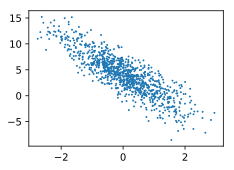

In [52]:
def use_svg_display():
  # 用矢量图显示
  display.set_matplotlib_formats('svg')
  
def set_figsize(figsize=(3.5, 2.5)):
  use_svg_display()
  # 设置图的尺寸
  plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1)

#### 3.22 读取数据集

In [0]:
def data_iter(batch_size,features,labels):
  """
  indices: []
  j : []
  """
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    j = nd.array(indices[i : min(i + batch_size, num_examples)])
    yield features.take(j), labels.take(j) # take 函数根据索引返回对应元素
  

In [54]:
batch_size = 10
for X , y in data_iter(batch_size, features, labels):
  print(X, y)
  break


[[-2.3367662  -0.9798637 ]
 [ 2.0277834  -1.1554744 ]
 [ 0.85692286 -1.1262228 ]
 [-0.16860738 -0.77358764]
 [-0.59888744 -1.7685903 ]
 [-1.7074687  -0.44738108]
 [ 0.16636673  0.22444552]
 [ 0.02764378  0.77693933]
 [-0.23319568  0.12973629]
 [-0.9264632  -0.37257782]]
<NDArray 10x2 @cpu(0)> 
[ 2.8426397 12.195398   9.744001   6.4891667  9.008271   2.3000464
  3.7669501  1.612254   3.2952247  3.6246123]
<NDArray 10 @cpu(0)>


#### 3.2.3  初始化模型参数

In [0]:
w = nd.random.normal(scale=0.01,shape=(num_inputs,1))
b = nd.zeros(shape=(1,))

In [0]:
w.attach_grad()
b.attach_grad()

#### 3.2.4 定义模型

In [0]:
def linreg(X, w, b):
  return nd.dot(X, w) + b

#### 3.2.5 定义损失函数

In [0]:
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#### 3.2.6 定义优化函数

In [0]:
def sgd(params, lr, batch_size):
  for param in params:
    param[:] = param - lr * param.grad / batch_size

#### 3.2.7 模型训练

In [60]:
lr = 0.03
num_ecochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_ecochs):
  for X, y in data_iter(batch_size, features, labels):
    with autograd.record():
      l = loss(net(X, w, b), y)
    l.backward()
    sgd([w, b], lr, batch_size)
  train_l = loss(net(features, w, b), labels)
  print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.046208
epoch 2, loss 0.000187
epoch 3, loss 0.000052
epoch 4, loss 0.000052
epoch 5, loss 0.000051


In [61]:
true_w, w

([2, -3.4], 
 [[ 1.999587 ]
  [-3.4005857]]
 <NDArray 2x1 @cpu(0)>)

In [62]:
true_b,b

(4.2, 
 [4.2002797]
 <NDArray 1 @cpu(0)>)

### 3.3 线性回归的简洁实现

#### 3.3.1 生成数据集

In [0]:
from mxnet import autograd, nd

num_inputs = 2
num_features = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1,shape=(num_features,num_inputs))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

#### 3.3.2 读取数据集

In [0]:
from mxnet.gluon import data as gdata

batch_size = 10
dataset = gdata.ArrayDataset(features,labels)
data_iter = gdata.DataLoader(dataset,batch_size,shuffle=True)

In [65]:
for X, y in data_iter:
  print(X, y)
  break


[[ 4.3464705e-01  2.4984303e+00]
 [-5.9956771e-01 -1.4015976e+00]
 [-6.7451274e-01  1.8617520e+00]
 [-2.9797339e-01 -1.3338127e-03]
 [ 3.0817601e-01 -2.8621876e-01]
 [-4.1796544e-01 -2.6250750e-01]
 [ 7.3972321e-01  7.7318847e-01]
 [ 4.3154022e-01 -5.7483792e-01]
 [-5.9318021e-02  3.0793399e-01]
 [-1.3716810e+00  1.5890713e-01]]
<NDArray 10x2 @cpu(0)> 
[-3.4174569   7.7603316  -3.476234    3.6180828   5.784286    4.266049
  3.0614314   7.0192084   3.0366464   0.91547656]
<NDArray 10 @cpu(0)>


#### 3.3.3 定义模型

In [0]:
from mxnet.gluon import nn

net = nn.Sequential()
net.add(nn.Dense(1))

#### 3.3.4 初始化模型参数

In [0]:
from mxnet import init

net.initialize(init.Normal(sigma=0.01))

#### 3.3.5 定义损失函数

In [0]:
from mxnet.gluon import loss as gloss

loss = gloss.L2Loss() 

#### 3.3.6 定义优化算法

In [0]:
from mxnet import gluon

trainer = gluon.Trainer(net.collect_params(),'sgd',{'learning_rate': 0.03})

#### 3.3.7 训练模型

In [70]:
num_epochs = 3

for epoch in range(1,num_epochs + 1):
  for X, y in data_iter:
    with autograd.record():
      l = loss(net(X), y)
    l.backward()
    trainer.step(batch_size)
  l = loss(net(features), labels)
  print('epoch: %d loss : %f' % (epoch, l.mean().asnumpy()))

epoch: 1 loss : 0.035500
epoch: 2 loss : 0.000132
epoch: 3 loss : 0.000052


#### 3.3.8 模型对比

In [71]:
dense = net[0]
true_w, dense.weight.data()

([2, -3.4], 
 [[ 2.0003386 -3.4007258]]
 <NDArray 1x2 @cpu(0)>)

In [72]:
true_b, dense.bias.data()

(4.2, 
 [4.1996136]
 <NDArray 1 @cpu(0)>)